[<img style="float: right;" src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" /> ](https://colab.research.google.com/github/taehojo/deeplearning_for_everyone_3rd/blob/master/run_project/17_LSTM_CNN_IMDB.ipynb)

# 18장 딥러닝을 이용한 자연어 처리

## 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

In [2]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 15s 12ms/step - loss: 0.4002 - accuracy: 0.8048 - val_loss: 0.3045 - val_accuracy: 0.8819
Epoch 2/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2375 - accuracy: 0.9043 - val_loss: 0.2907 - val_accuracy: 0.8750
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1845 - accuracy: 0.9313 - val_loss: 0.2674 - val_accuracy: 0.8955
Epoch 4/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1538 - accuracy: 0.9422 - val_loss: 0.2860 - val_accuracy: 0.8864
Epoch 5/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1198 - accuracy: 0.9571 - val_loss: 0.2935 - val_accuracy: 0.8870
Epoch 6/100
782/782 [==============================] - 3s 4ms/step - loss: 0.3345 - accuracy: 0.8750

 Test Accuracy: 0.8750


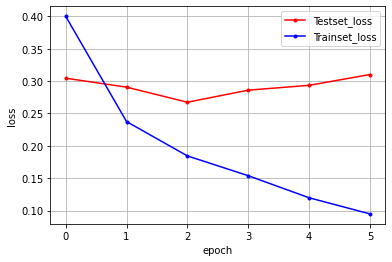

In [3]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()